In [5]:
import torch
%matplotlib inline
from IPython import display

from matplotlib import pyplot as plt 
import numpy as np
import random

In [6]:
num_input = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2

features = torch.randn(num_examples,num_input,dtype=torch.float32)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),dtype=torch.float32)

In [7]:
print(features[0], labels[0])

tensor([-0.5507,  0.1513]) tensor(2.6030)


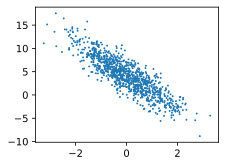

In [18]:
def use_svd_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.3,2.5)):
    use_svd_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)


In [25]:
def data_iter(batch_szie, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_szie, num_examples)])
        yield features.index_select(0, j), labels.index_select(
            0, j)


In [27]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.0708,  1.0706],
        [-1.8320,  1.4727],
        [-0.6222, -0.8079],
        [-2.1255, -0.3762],
        [-0.4947,  0.6816],
        [ 1.6131, -0.1926],
        [-0.5507,  0.1513],
        [ 0.3139,  2.3499],
        [ 0.6536, -0.6582],
        [-0.8240, -1.0393]]) tensor([ 0.4418, -4.4764,  5.7008,  1.2263,  0.9107,  8.0701,  2.6030, -3.1820,
         7.7460,  6.0948])


In [31]:
w = torch.tensor(np.random.normal(0, 0.01, (num_input, 1)),
                 dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [36]:
def linreg(X, w, b):
    return torch.mm(X, w) + b


In [33]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size()))**2 / 2


In [35]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr* param.grad / batch_size

In [39]:
lr = 0.03
num_epoch = 3
net = linreg
loss = squared_loss

for epoch in range(num_epoch):

    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000054
epoch 2, loss 0.000054
epoch 3, loss 0.000054


In [40]:
print(true_w,w)
print(true_b,b)

[2, -3.4] tensor([[ 2.0006],
        [-3.4005]], requires_grad=True)
4.2 tensor([4.2001], requires_grad=True)
